In [2]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline



In [3]:
ticksize= 12
titlesize = 16
mpl.rcParams.update({'font.size':ticksize }) # legend
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize':titlesize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams.update({'image.cmap':'rainbow'})
mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# To use unicode
mpl.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'})
# To get sans-serif
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

def sci_not(num,dec):
    if num>0:
        exp = int(np.log10(num)+100)-100
        sci = (r"$%.10f"%(num/10**exp))[:dec+2+1*(dec>0)]+r"\cdot10^{%d}$"%exp
    else:
        sci = '$0$'
    return sci

[[ 0.        ]
 [ 0.00628319]]


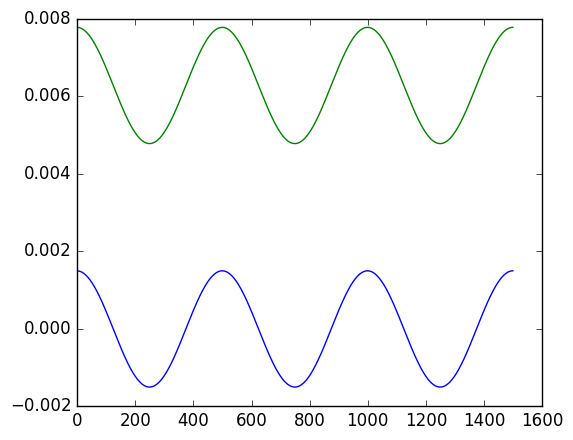

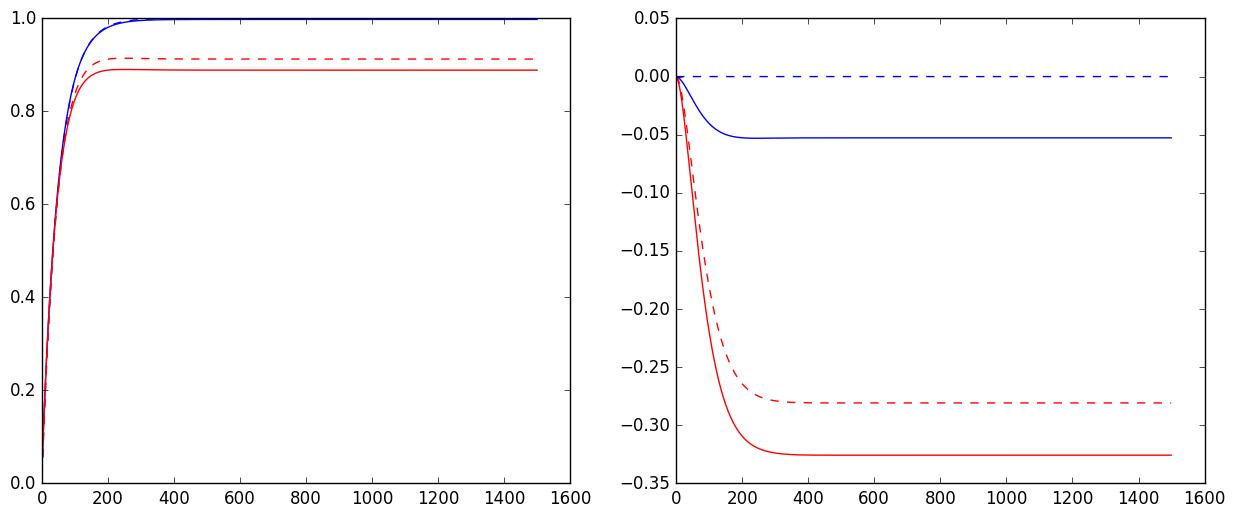

In [164]:
N = 2
n = 1500
ns= np.arange(n)+1

pi2= np.pi *2
a  = 1e-4
g = 0.02

Qp = 15
Qs = 0.002
delta = 1e-4*np.cos(pi2*Qs*ns)*np.ones(N)[:,np.newaxis]


dmu0= pi2* 0.001 * np.linspace(0,1,N)[:,np.newaxis]
print(dmu0)


dmu = np.ones((N,n)) * dmu0
dmu+= delta*Qp
# dmu += np.random.normal(0,1,(N,n))*0.01
# dmu += 

sumdmu = np.cumsum(dmu,axis=1)
# ran = np.arange(n)
# elements = np.power.outer((1-g)*dmu,ran)

sumdamp = np.power.outer(np.ones(N)*(1-g),1+np.arange(n))


elements = sumdamp*np.exp(-1j*sumdmu)
thesum = np.cumsum(elements,axis=1) + 1


anal = (1-(1-g)**ns*np.exp(-ns*1j*dmu0)) / (1-(1-g)*np.exp(-1j*dmu0))

plt.figure()
plt.plot(dmu.T)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(N):
    c = ['b','r','g'][i%3]
    ax1.plot(g*thesum[i,:].real ,c=c)
    ax1.plot(g*anal[i,:].real   ,'--',c=c)
    ax2.plot(g*thesum[i,:].imag ,c=c)
    ax2.plot(g*anal[i,:].imag   ,'--',c=c)


# plt.ylim(0.5,1.1)
# print(thesum)

In [123]:
print(dmu)
print(sumdmu)
print(sumdamp)

[[  1.48817205e-03   1.45287474e-03   1.39466473e-03   1.31446002e-03
    1.21352549e-03   1.09345294e-03   9.56135985e-04   8.03740192e-04
    6.38668937e-04   4.63525492e-04   2.81071972e-04   9.41857793e-05
   -9.41857793e-05  -2.81071972e-04  -4.63525492e-04  -6.38668937e-04
   -8.03740192e-04  -9.56135985e-04  -1.09345294e-03  -1.21352549e-03
   -1.31446002e-03  -1.39466473e-03  -1.45287474e-03  -1.48817205e-03
   -1.50000000e-03  -1.48817205e-03  -1.45287474e-03  -1.39466473e-03
   -1.31446002e-03  -1.21352549e-03  -1.09345294e-03  -9.56135985e-04
   -8.03740192e-04  -6.38668937e-04  -4.63525492e-04  -2.81071972e-04
   -9.41857793e-05   9.41857793e-05   2.81071972e-04   4.63525492e-04
    6.38668937e-04   8.03740192e-04   9.56135985e-04   1.09345294e-03
    1.21352549e-03   1.31446002e-03   1.39466473e-03   1.45287474e-03
    1.48817205e-03   1.50000000e-03   1.48817205e-03   1.45287474e-03
    1.39466473e-03   1.31446002e-03   1.21352549e-03   1.09345294e-03
    9.56135985e-04  

In [18]:
a = np.ones(3)
b = np.arange(4)
np.power.outer(a,b)



[[ 0.98        0.9604      0.941192    0.92236816  0.9039208   0.88584238
   0.86812553  0.85076302  0.83374776  0.81707281]
 [ 0.98        0.9604      0.941192    0.92236816  0.9039208   0.88584238
   0.86812553  0.85076302  0.83374776  0.81707281]
 [ 0.98        0.9604      0.941192    0.92236816  0.9039208   0.88584238
   0.86812553  0.85076302  0.83374776  0.81707281]]
